# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

1. Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.

In [5]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ds4e/wrangling/main/assignment/data/airbnb_hw.csv'
airbnb = pd.read_csv(url)

 2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [6]:
# Get the dimensions of the dataset
print("Dimensions of the dataset:", airbnb.shape)  # (rows, columns)

# Get the number of observations (rows)
print("Number of observations:", airbnb.shape[0])

# Get the number of variables (columns)
print("Number of variables:", airbnb.shape[1])

# Display column names (variables)
print("Variables included:", airbnb.columns.tolist())

# Show the first few rows
print(airbnb.head())

Dimensions of the dataset: (30478, 13)
Number of observations: 30478
Number of variables: 13
Variables included: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room

 3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [7]:
room_property_crosstab = pd.crosstab(airbnb['Property Type'], airbnb['Room Type'])

# Display the cross-tabulation
print(room_property_crosstab)

Room Type        Entire home/apt  Private room  Shared room
Property Type                                              
Apartment                  15669         10748          685
Bed & Breakfast               13           155           12
Boat                           7             1            0
Bungalow                       4             0            0
Cabin                          1             1            0
Camper/RV                      6             1            0
Castle                         0             1            0
Chalet                         0             1            0
Condominium                   72            22            0
Dorm                           4            16           11
House                        752          1258           80
Hut                            0             2            0
Lighthouse                     1             0            0
Loft                         392           312           49
Other                         14        

Based on the data above, it seems that most of the rentals listed in New York are apartments. Most of the properties listed are for the entire home. However, for houses, bed & breakfasts, and dorms, it is more popular to have a private room rather than the entire property. This makes sense given the extremely high rental prices in New York City.

4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

Yes the data seems to be badly scaled with many outliers. Most of the apartments seem to be priced at the $100-$200 a night range, with some extremely luxurious listings being the outliers.  

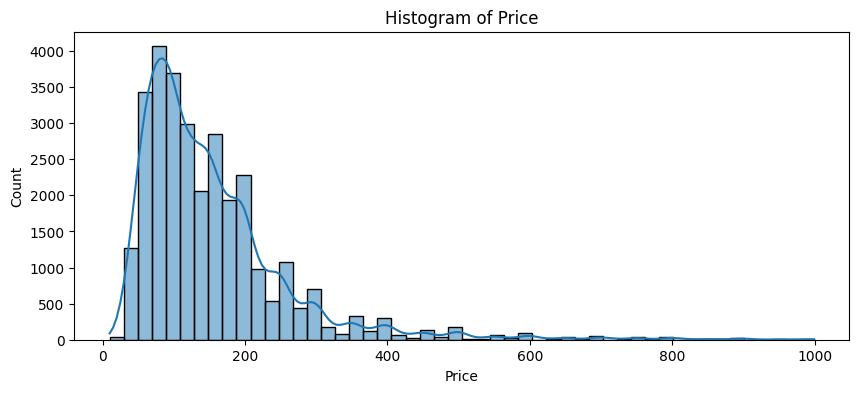

<ipython-input-11-954a4d58bf13>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb['Price'], shade=True)


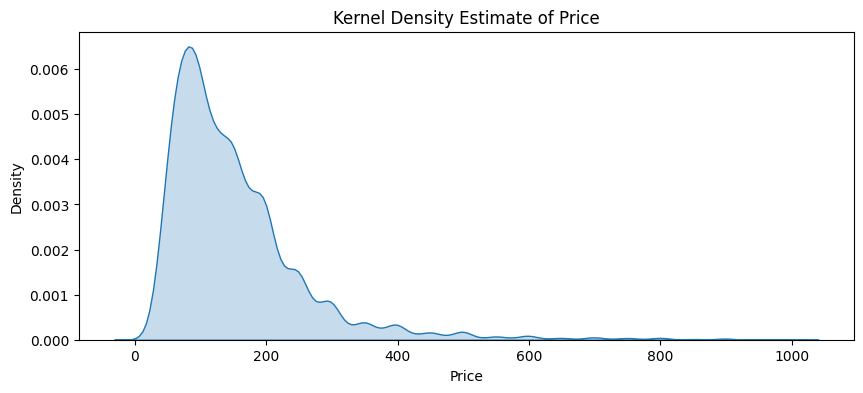

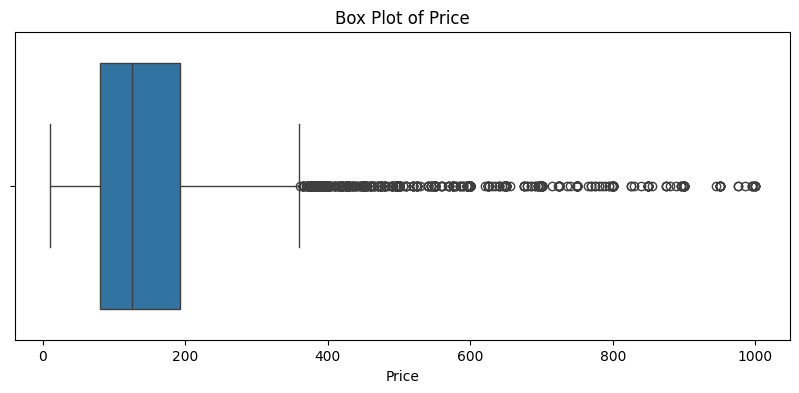

Statistical Summary of Price:
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


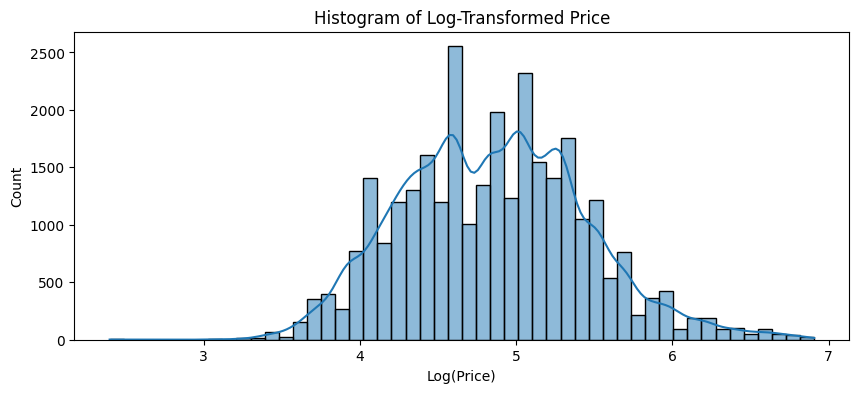

<ipython-input-11-954a4d58bf13>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb['price_log'], shade=True)


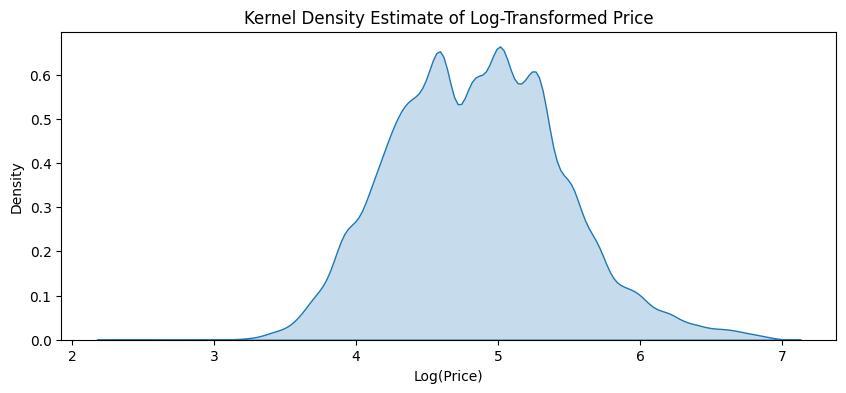

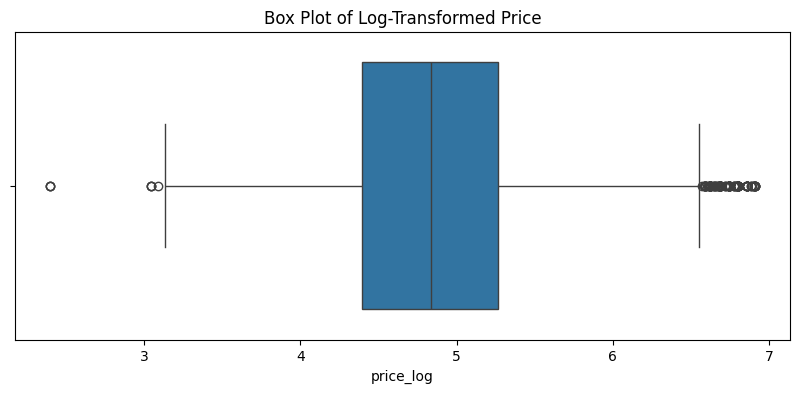

Statistical Summary of Log-Transformed Price:
 count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Price' to numeric (in case of formatting issues like '$' signs)
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Drop missing values in Price
airbnb = airbnb.dropna(subset=['Price'])

# Step 1: Plot Histogram
plt.figure(figsize=(10, 4))
sns.histplot(airbnb['Price'], bins=50, kde=True)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.show()

# Step 2: Kernel Density Plot
plt.figure(figsize=(10, 4))
sns.kdeplot(airbnb['Price'], shade=True)
plt.title("Kernel Density Estimate of Price")
plt.xlabel("Price")
plt.show()

# Step 3: Box Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=airbnb['Price'])
plt.title("Box Plot of Price")
plt.show()

# Step 4: Statistical Summary
print("Statistical Summary of Price:\n", airbnb['Price'].describe())

# Step 5: Log Transformation (handle zeros before log)
airbnb['price_log'] = np.log1p(airbnb['Price'])  # log1p avoids log(0) errors

# Repeat the steps with price_log
plt.figure(figsize=(10, 4))
sns.histplot(airbnb['price_log'], bins=50, kde=True)
plt.title("Histogram of Log-Transformed Price")
plt.xlabel("Log(Price)")
plt.show()

plt.figure(figsize=(10, 4))
sns.kdeplot(airbnb['price_log'], shade=True)
plt.title("Kernel Density Estimate of Log-Transformed Price")
plt.xlabel("Log(Price)")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=airbnb['price_log'])
plt.title("Box Plot of Log-Transformed Price")
plt.show()

print("Statistical Summary of Log-Transformed Price:\n", airbnb['price_log'].describe())

5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<ipython-input-12-cf16880d9918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price_log'] = np.log1p(airbnb['Price'])  # log1p avoids log(0) errors


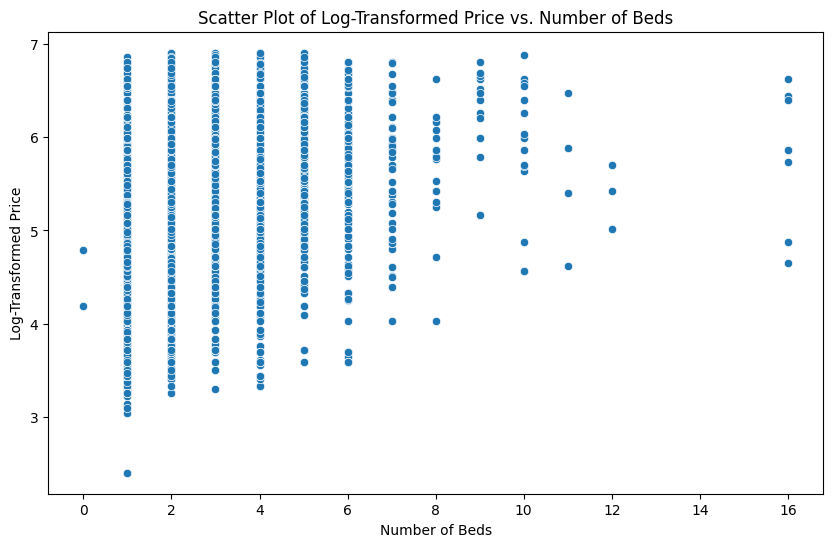

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

In [12]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Drop missing values in Price and Beds
airbnb = airbnb.dropna(subset=['Price', 'Beds'])

# Step 1: Log transformation of Price
airbnb['price_log'] = np.log1p(airbnb['Price'])  # log1p avoids log(0) errors

# Step 2: Scatter plot of price_log vs. Beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb['Beds'], y=airbnb['price_log'])
plt.title("Scatter Plot of Log-Transformed Price vs. Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.show()

# Step 3: Group by Beds and compute description of Price
price_by_beds = airbnb.groupby('Beds')['Price'].describe()

# Display the summary statistics
print(price_by_beds)

Based on the data above, it seems that the price of the rental increases as the number of beds increase. As the number of beds increase, the standard deviation of the prices also tend to increase as there seems to be more varaiablity with more expensive/luxury rentals.